In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist.data.astype(np.float32)     # (70000, 784)
y = mnist.target.astype(np.int64)     # dígitos 0..9 (strings -> int)


In [8]:
print(mnist.keys())
# dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'DESCR'])
print("Shape de X:", mnist.data.shape)   # (70000, 784)
print("Shape de y:", mnist.target.shape) # (70000,)
print("Tipo de X:", type(mnist.data))

print(mnist.data[:5])    # primeras 5 imágenes en forma de vectores (784 columnas)
print(mnist.target[:5])  # etiquetas correspondientes

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Shape de X: (70000, 784)
Shape de y: (70000,)
Tipo de X: <class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' '1' '9']


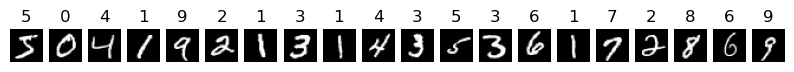

In [ ]:
plt.figure(figsize=(20, 8))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(mnist.data[i].reshape(28, 28), cmap="gray")
    plt.title(mnist.target[i])
    plt.axis("off")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/7, random_state=42, stratify=y
)

In [6]:
clf = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),  # con datos esparsos/altas dims, with_mean=False evita centrado denso
    ("svm", LinearSVC(C=1.0, tol=1e-4, max_iter=5000, dual=False, random_state=42))
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall    (macro): {recall:.4f}")
print(f"F1        (macro): {f1:.4f}\n")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy : 0.9143
Precision (macro): 0.9131
Recall    (macro): 0.9132
F1        (macro): 0.9130

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       986
           1       0.94      0.98      0.96      1125
           2       0.92      0.89      0.90       999
           3       0.89      0.87      0.88      1020
           4       0.93      0.92      0.92       975
           5       0.87      0.88      0.87       902
           6       0.94      0.96      0.95       982
           7       0.93      0.94      0.93      1042
           8       0.89      0.85      0.87       975
           9       0.89      0.87      0.88       994

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



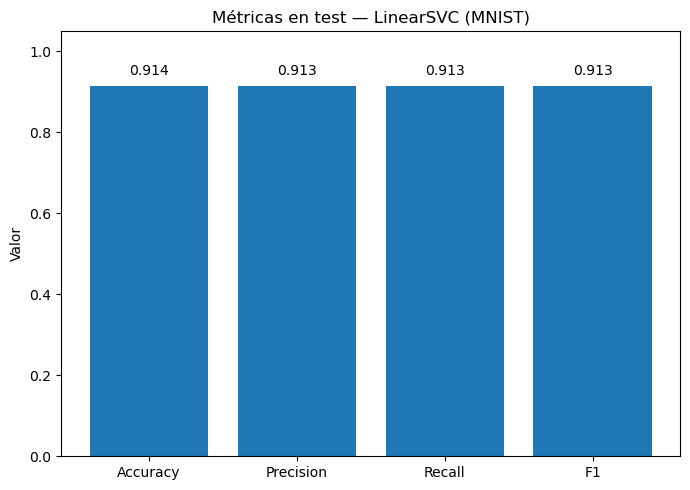

In [11]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals)
plt.ylim(0, 1.05)
plt.title("Métricas en test — LinearSVC (MNIST)")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    h = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, h + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

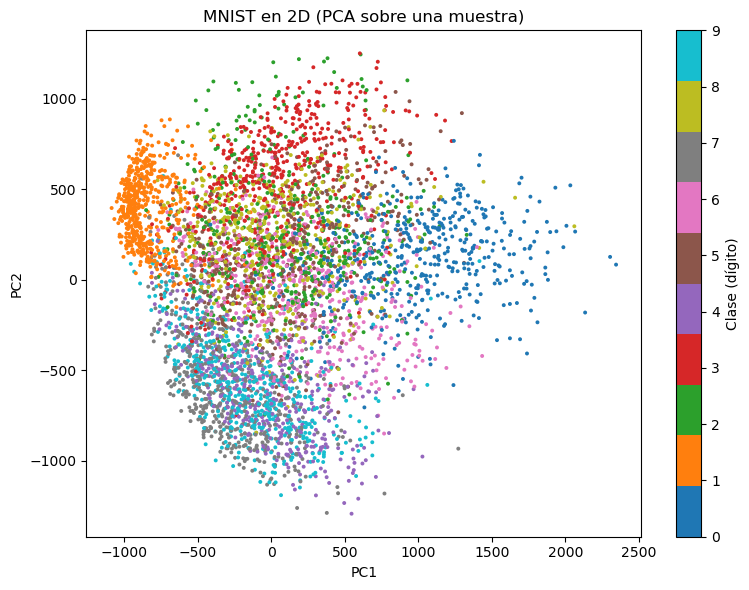

In [12]:
pca_viz = PCA(n_components=2, random_state=42)
# muestreamos ~5000 puntos para el scatter
rng = np.random.RandomState(42)
sample_size = min(5000, len(X))
idx_sample = rng.choice(len(X), size=sample_size, replace=False)
X_pca = pca_viz.fit_transform(X[idx_sample])

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y[idx_sample], cmap="tab10", s=8, edgecolor="none")
plt.title("MNIST en 2D (PCA sobre una muestra)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label("Clase (dígito)")
plt.tight_layout()
plt.show()

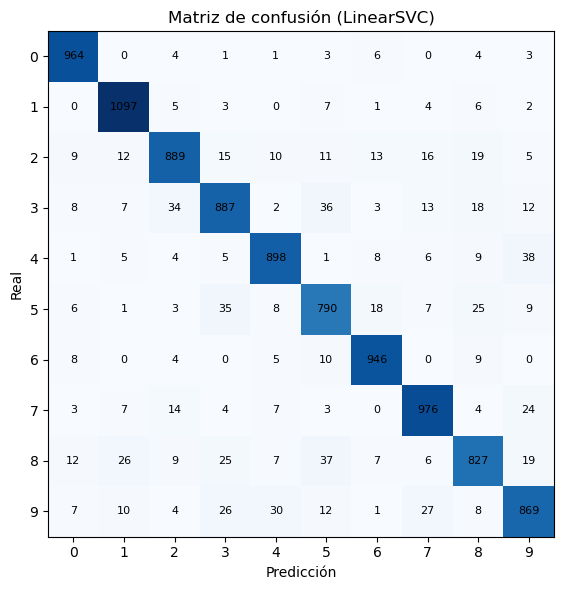

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Matriz de confusión (LinearSVC)")
plt.xticks(ticks=range(10), labels=range(10))
plt.yticks(ticks=range(10), labels=range(10))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=8)
plt.xlabel("Predicción"); plt.ylabel("Real")
plt.tight_layout()
plt.show()

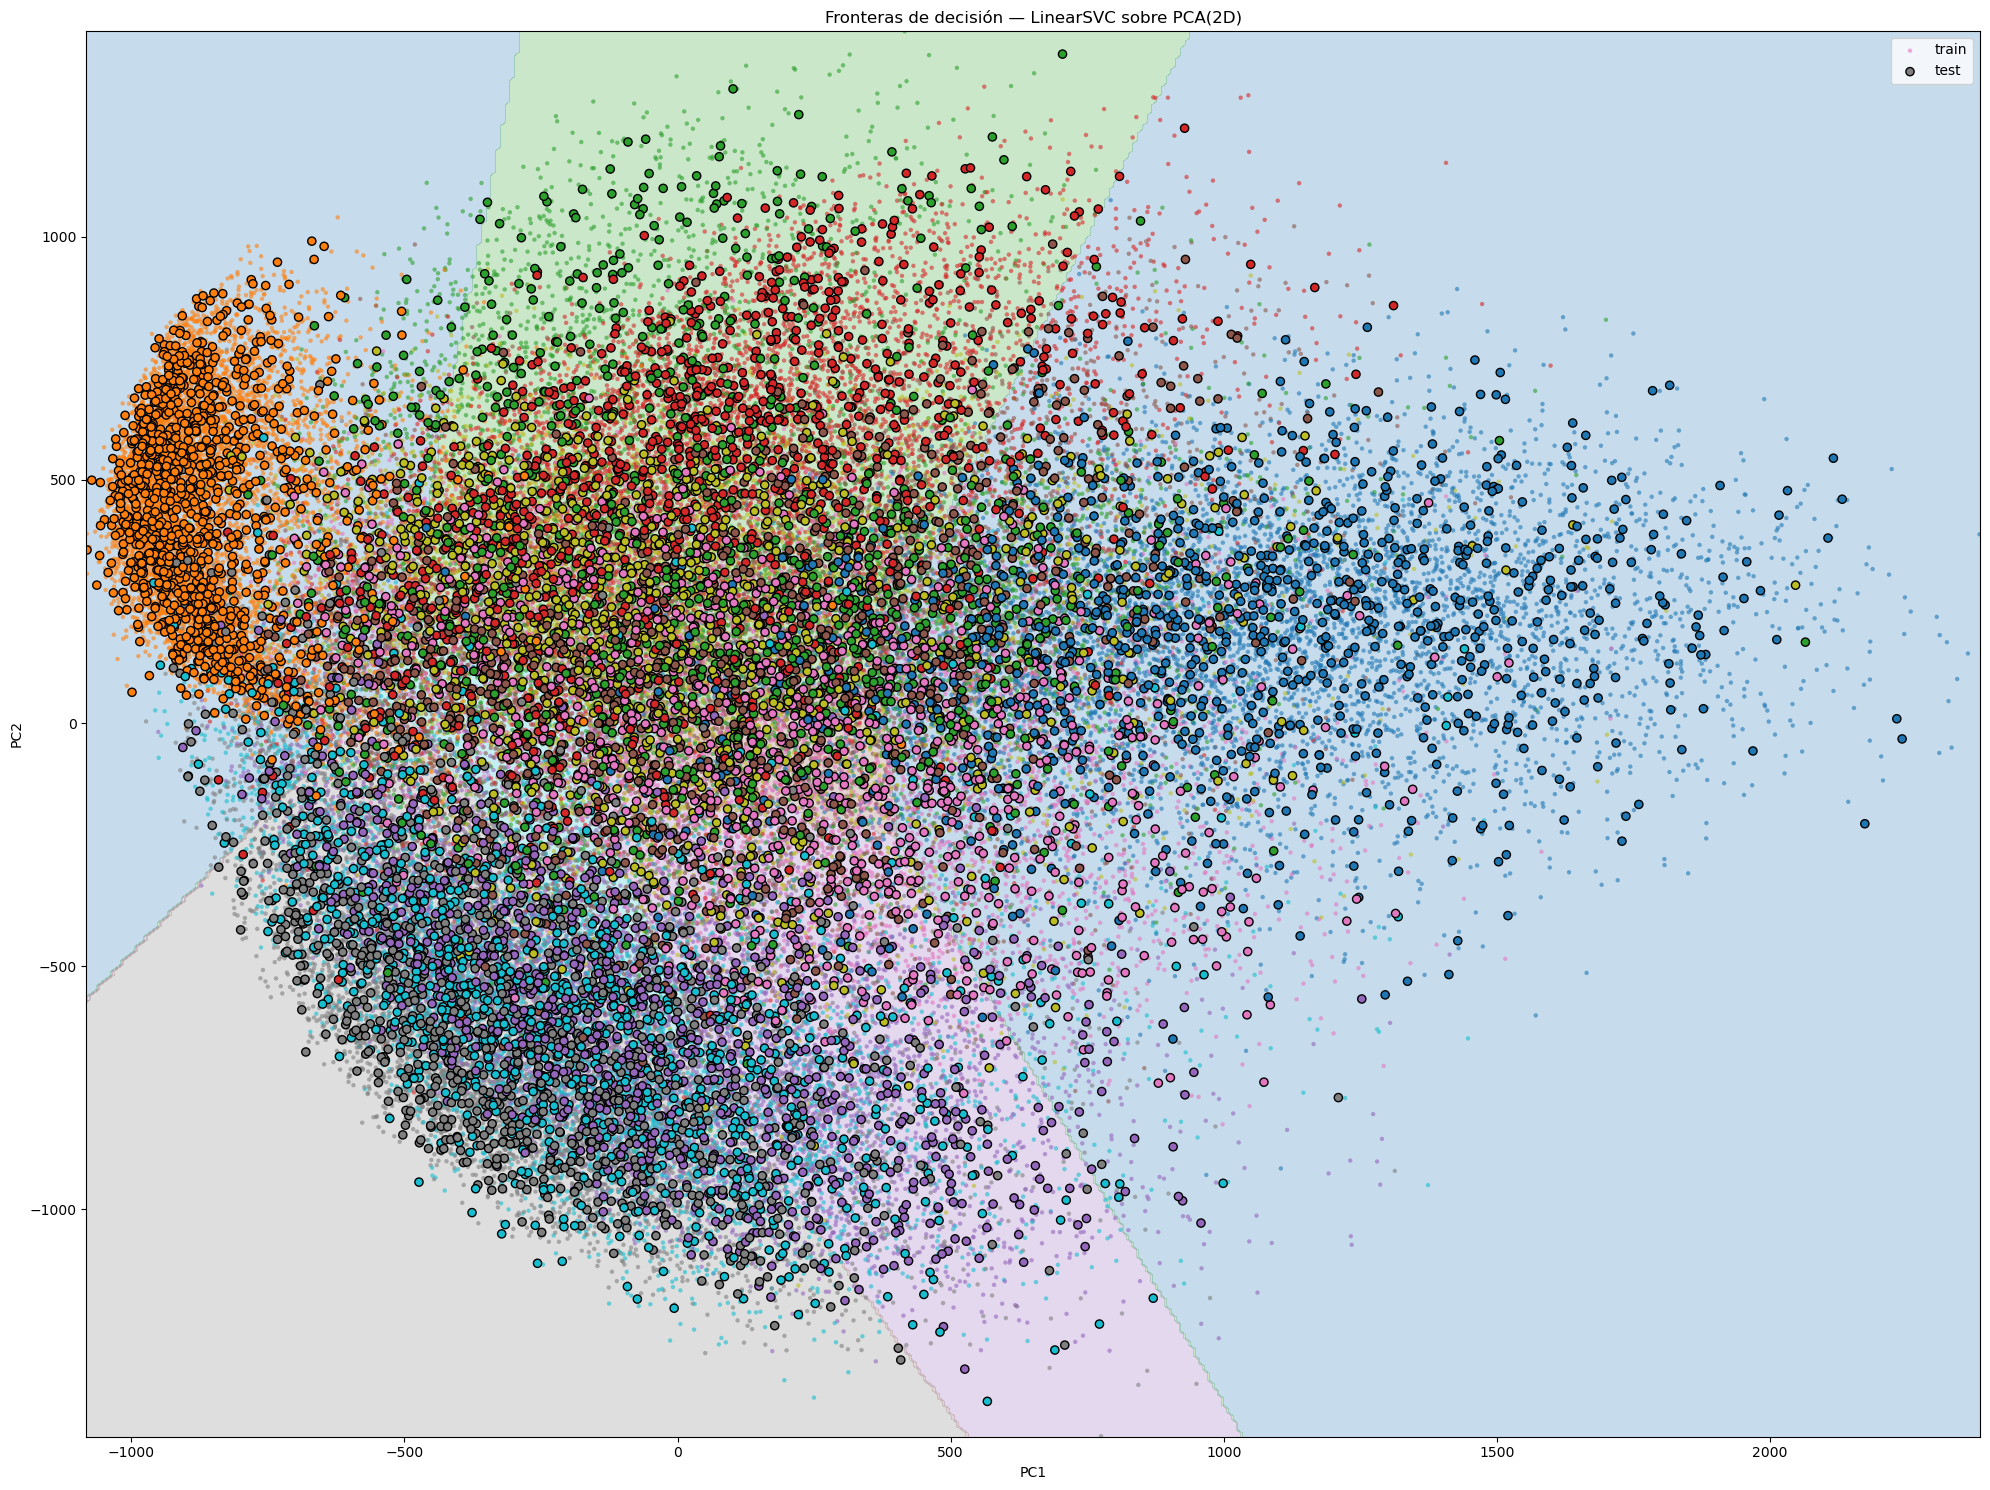

In [18]:
pca2 = PCA(n_components=2, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca  = pca2.transform(X_test)

clf2d = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("svm", LinearSVC(C=1.0, tol=1e-4, max_iter=5000, dual=False, random_state=42))
])
clf2d.fit(X_train_pca, y_train)

# malla en el plano PCA
x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = clf2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(20,15))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="tab10")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10",
            s=10, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X_test_pca[:,0],  X_test_pca[:,1],  c=y_test,  cmap="tab10",
            s=35, edgecolor="k",   label="test")
plt.title("Fronteras de decisión — LinearSVC sobre PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()
